**As a warm up, I am trying to compare some of the variables against each other and fit into a linear regression model.**

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [155]:
dataframe = pd.read_csv('patientdata.csv') 

In [156]:
dataframe.head(10)

,Scan Number,Name,FD ROI 1 (FD-Traditional),FD ROI 1 (FD-Modified),FD ROI 2 (FD-Traditional),FD ROI (FD-Modified),Cortical Thickness Pan,Cortical Thickness Trans,BMI,Age,...,T-Score L1-L4,Low BMD Spine,Spine Osteoporosis Diagnosis,Low BMD Hip,Hip Osteoporosis Diagnosis,Unified Diagonosis,BMD Femoral Neck,T-Score Femoral Neck,BMD Total Femur,T-Score Total Femur
0,16,Adelice Leite da Silva,0.786,"1,735","1,099","1,593",3.25,3.25,2,53,...,0.1,0.0,0.0,0.0,0.0,0.0,0.978,-0.4,1.008,0.0
1,14,Adelita Alves do Espirito Santo,0.453,"1,696","1,348","1,256",3.75,3.50,1,68,...,-0.2,0.0,0.0,0.0,0.0,0.0,1.001,-0.3,1.054,0.4
2,84,Alice Pereira Miranda,"1,636","1,885",0.876,"1,793",3.25,3.25,1,52,...,0.9,0.0,0.0,0.0,0.0,0.0,1.177,1.0,1.186,1.4
3,17,Alzira Alves da Silva,"1,215","1,566","1,285","1,545",2.75,2.50,2,60,...,-2.9,1.0,1.0,0.0,0.0,1.0,0.940,-0.7,0.909,-0.8
4,79,Amariles de Sousa Maia,"1,807","1,933","1,120","1,892",2.75,2.75,2,53,...,-3.4,1.0,1.0,1.0,1.0,1.0,0.607,-3.1,0.714,-2.3
5,82,Ana Maria Braz de Oliveira,0.602,"1,812",-0.030,"1,421",3.50,3.75,1,53,...,-2.7,1.0,1.0,0.0,0.0,1.0,0.861,-1.3,0.814,-1.5
6,88,Ana Marta Oliveira de Pinho,0.733,"1,836",0.917,"1,706",3.75,3.75,2,56,...,0.5,0.0,0.0,0.0,0.0,0.0,1.143,0.8,1.182,1.4
7,102,Ana Siqueira Alves Soares,0.869,"2,025","1,211","1,843",3.50,3.25,2,71,...,-3.2,1.0,1.0,0.0,0.0,1.0,0.826,-1.5,0.792,-1.7
8,101,Anália Martins Pinto,"1,037","1,756","1,877","1,793",3.25,3.25,1,72,...,0.2,0.0,0.0,0.0,0.0,0.0,1.043,0.0,1.135,1.0
9,27,Andrea Alves Queiroz,"1,243","1,940","1,011","1,899",2.50,2.50,1,60,...,-0.8,0.0,0.0,0.0,0.0,0.0,0.872,-1.2,0.976,-0.3


In [157]:
dataframe.columns.to_list()

['Scan Number',
 'Name',
 'FD ROI 1 (FD-Traditional)',
 'FD ROI 1 (FD-Modified)',
 'FD ROI 2 (FD-Traditional)',
 'FD ROI  (FD-Modified)',
 'Cortical Thickness Pan',
 'Cortical Thickness Trans',
 'BMI',
 'Age',
 'Height',
 'Weight',
 'BMD L1-L4',
 'T-Score L1-L4',
 'Low BMD Spine',
 'Spine Osteoporosis Diagnosis',
 'Low BMD Hip',
 'Hip Osteoporosis Diagnosis',
 'Unified Diagonosis',
 'BMD Femoral Neck',
 'T-Score Femoral Neck',
 'BMD Total Femur',
 'T-Score Total Femur']

# **Dataset Description: Osteoporosis and Bone Health Analysis**
Date: Monday, March 10

## **Overview**
This dataset contains patient information, bone mineral density (BMD) measurements, fractal dimension (FD) values, and osteoporosis diagnoses. It is used to analyze risk factors and predict osteoporosis using machine learning.

## **Key Features**
- **Patient Information**: Age, BMI, height, weight.
- **Bone Density Measurements**:
  - **BMD (g/cm²)** and **T-Scores** for **L1-L4 spine, femoral neck, and total femur**.
  - Higher BMD and T-scores indicate stronger bones.
- **Fractal Dimension (FD) Values**: Measures bone microarchitecture in different regions.
- **Cortical Thickness**: Thickness of the outer bone layer (panoramic and transversal views).
- **Osteoporosis Diagnosis (Binary)**:
  - **Spine & Hip Osteoporosis**: 1 = Diagnosed, 0 = Not diagnosed.
  - **Unified Diagnosis**: 1 if osteoporosis is present in any major bone site.

## **Usage**
This dataset is analyzed using regression to analyze osteoporosis possibilities based on BMD, T-Scores, and patient characteristics.


In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Date: March 11, Tuesday  
## **Now, Let's try using Logistic Regression to predict the target variable(Unified diagnosis). There are lots of commas in the patient data in four of the columns instead of '.' for floating point value representation. Thus, I am trying to replace those commas with the '.''s and then casting to float values from their object data types.**

In [159]:
dataframe["FD ROI 1 (FD-Traditional)"] = dataframe["FD ROI 1 (FD-Traditional)"].str.replace(',', '.', regex=True).astype(float)
dataframe["FD ROI 1 (FD-Modified)"] = dataframe["FD ROI 1 (FD-Modified)"].str.replace(',', '.', regex=True).astype(float)
dataframe["FD ROI 2 (FD-Traditional)"] = dataframe["FD ROI 2 (FD-Traditional)"].str.replace(',', '.', regex=True).astype(float)
dataframe["FD ROI  (FD-Modified)"] = dataframe["FD ROI  (FD-Modified)"].str.replace(',', '.', regex=True).astype(float)
dataframe.head()



,Scan Number,Name,FD ROI 1 (FD-Traditional),FD ROI 1 (FD-Modified),FD ROI 2 (FD-Traditional),FD ROI (FD-Modified),Cortical Thickness Pan,Cortical Thickness Trans,BMI,Age,...,T-Score L1-L4,Low BMD Spine,Spine Osteoporosis Diagnosis,Low BMD Hip,Hip Osteoporosis Diagnosis,Unified Diagonosis,BMD Femoral Neck,T-Score Femoral Neck,BMD Total Femur,T-Score Total Femur
0,16,Adelice Leite da Silva,0.786,1.735,1.099,1.593,3.25,3.25,2,53,...,0.1,0.0,0.0,0.0,0.0,0.0,0.978,-0.4,1.008,0.0
1,14,Adelita Alves do Espirito Santo,0.453,1.696,1.348,1.256,3.75,3.50,1,68,...,-0.2,0.0,0.0,0.0,0.0,0.0,1.001,-0.3,1.054,0.4
2,84,Alice Pereira Miranda,1.636,1.885,0.876,1.793,3.25,3.25,1,52,...,0.9,0.0,0.0,0.0,0.0,0.0,1.177,1.0,1.186,1.4
3,17,Alzira Alves da Silva,1.215,1.566,1.285,1.545,2.75,2.50,2,60,...,-2.9,1.0,1.0,0.0,0.0,1.0,0.940,-0.7,0.909,-0.8
4,79,Amariles de Sousa Maia,1.807,1.933,1.120,1.892,2.75,2.75,2,53,...,-3.4,1.0,1.0,1.0,1.0,1.0,0.607,-3.1,0.714,-2.3


In [160]:
#Dropping these indices because there is Excludia written in those rows.

updated_dataframe = dataframe.drop(index = [47, 65, 88])
X = updated_dataframe.drop(columns=['Unified Diagonosis','Scan Number','Name']) 
Y = updated_dataframe['Unified Diagonosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)   

##Dropping all the null values
X_train = X_train.dropna()  
Y_train = Y_train[X_train.index]  

X_test = X_test.dropna()  
Y_test = Y_test[X_test.index]  

print("Missing values in X_train:", X_train.isnull().sum())
print("Missing values in X_test:", X_test.isnull().sum())
print("Missing values in Y_train:", Y_train.isnull().sum())
print("Missing values in Y_test:", Y_test.isnull().sum())
print("Missing values in X:", X.isnull().sum())
print("Missing values in Y:", Y.isnull().sum())


Missing values in X_train: FD ROI 1 (FD-Traditional)       0
FD ROI 1 (FD-Modified)          0
FD ROI 2 (FD-Traditional)       0
FD ROI  (FD-Modified)           0
Cortical Thickness Pan          0
Cortical Thickness Trans        0
BMI                             0
Age                             0
Height                          0
Weight                          0
BMD L1-L4                       0
T-Score L1-L4                   0
Low BMD Spine                   0
Spine Osteoporosis Diagnosis    0
Low BMD Hip                     0
Hip Osteoporosis Diagnosis      0
BMD Femoral Neck                0
T-Score Femoral Neck            0
BMD Total Femur                 0
T-Score Total Femur             0
dtype: int64
Missing values in X_test: FD ROI 1 (FD-Traditional)       0
FD ROI 1 (FD-Modified)          0
FD ROI 2 (FD-Traditional)       0
FD ROI  (FD-Modified)           0
Cortical Thickness Pan          0
Cortical Thickness Trans        0
BMI                             0
Age             

In [161]:
m = updated_dataframe["Low BMD Spine"].mode()[0]
n = updated_dataframe["Spine Osteoporosis Diagnosis"].mode()[0]
o = updated_dataframe["Hip Osteoporosis Diagnosis"].mode()[0]

updated_dataframe["Low BMD Spine"].replace(to_replace = np.nan, value = m )
updated_dataframe["Spine Osteoporosis Diagnosis"].replace(to_replace = np.nan, value = n)
updated_dataframe["Hip Osteoporosis Diagnosis"].replace(to_replace = np.nan, value = o)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [162]:
Y_pred = model.predict(X_test)


In [163]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))


from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")




Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [164]:
X_cleaned = X.dropna()
Y_cleaned = Y.loc[X_cleaned.index]

cv_scores = cross_val_score(model, X_cleaned, Y_cleaned, cv=5, scoring='r2')  # r2 scoring for regression

# Print the cross-validation results
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Mean cross-validation R^2 score: {np.mean(cv_scores):.2f}")
print(f"Standard deviation of cross-validation R^2 score: {np.std(cv_scores):.2f}")

Cross-validation R^2 scores: [1.         0.69047619 1.         1.         1.        ]
Mean cross-validation R^2 score: 0.94
Standard deviation of cross-validation R^2 score: 0.12


 **Now we can see that our model does decent work in most of the cases but sometimes can only go so far to predict jut the average value in the dataset. We can try improving our model performance by reducing the dimensionality of our data, and use feature selection using a heatmap.**

In [165]:
import seaborn as sn
import matplotlib.pyplot as plt
updated_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 102
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Scan Number                   100 non-null    object 
 1   Name                          100 non-null    object 
 2   FD ROI 1 (FD-Traditional)     100 non-null    float64
 3   FD ROI 1 (FD-Modified)        100 non-null    float64
 4   FD ROI 2 (FD-Traditional)     100 non-null    float64
 5   FD ROI  (FD-Modified)         100 non-null    float64
 6   Cortical Thickness Pan        100 non-null    float64
 7   Cortical Thickness Trans      100 non-null    float64
 8   BMI                           100 non-null    int64  
 9   Age                           100 non-null    int64  
 10  Height                        100 non-null    int64  
 11  Weight                        100 non-null    float64
 12  BMD L1-L4                     100 non-null    float64
 13  T-Score L1

<Axes: >

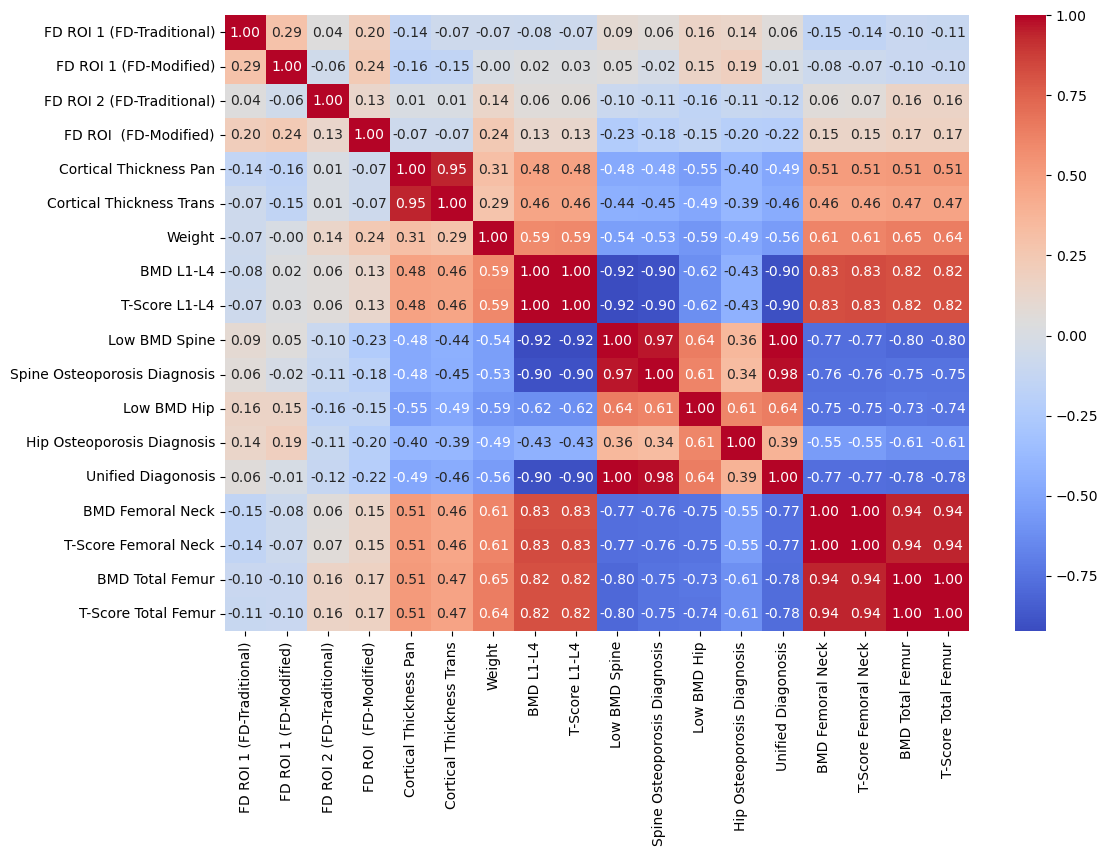

In [166]:
dataframe.drop(columns=['Scan Number', 'Name', 'BMI', 'Height', 'Age'], inplace=True)
corr_matrix = dataframe.corr()
plt.figure(figsize  = (12, 8))
sn.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")

**Now, From the heatmap, it's highly evident that the T-Score of the L1-L4 region is the most successful correlating factor with the Target variable(which is the unified diagonosis). Also, let's see what happens when we pick our top features and use it for training."**

In [167]:
selected_features = ["T-Score L1-L4",
                   "BMD L1-L4", "T-Score Total Femur", "BMD Femoral Neck",
                   "T-Score Femoral Neck", "BMD Total Femur"]

# Update X_train and X_test with selected features
X_train_updated = X_cleaned[selected_features]
X_test_updated = X_test[selected_features]  # Ensure test set has same features
Y_train_updated = Y_cleaned.loc[X_cleaned.index]

In [168]:

# Initialize and train the model
secmodel = LogisticRegression(max_iter=1000)
secmodel.fit(X_train_updated, Y_train_updated)  # Use correct target variable

# Make predictions
Y_pred = secmodel.predict(X_test_updated)
# Print Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 1.0


In [169]:


model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(secmodel, X_cleaned, Y_cleaned, cv=5, scoring='r2')  # r2 scoring for regression

# Print the cross-validation results
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Mean cross-validation R^2 score: {np.mean(cv_scores):.2f}")
print(f"Standard deviation of cross-validation R^2 score: {np.std(cv_scores):.2f}")


Cross-validation R^2 scores: [1.         0.69047619 1.         1.         1.        ]
Mean cross-validation R^2 score: 0.94
Standard deviation of cross-validation R^2 score: 0.12


**For some reason, I couldn't achieve what I expected, and my troubleshooting skill did not work here. That being said, I'll be back with solution to this for sure. For now, I am going to learn a new supervised machine learning model and try that to this work**

Date: March 13 Update: I found a github repo doing a very similar work as me and I'm taking their approach to try and solve my problem.

In [170]:
dataframe.isnull().sum()

FD ROI 1 (FD-Traditional)        0
FD ROI 1 (FD-Modified)           0
FD ROI 2 (FD-Traditional)        0
FD ROI  (FD-Modified)            0
Cortical Thickness Pan           0
Cortical Thickness Trans         0
Weight                           0
BMD L1-L4                        0
T-Score L1-L4                    0
Low BMD Spine                   40
Spine Osteoporosis Diagnosis     2
Low BMD Hip                      2
Hip Osteoporosis Diagnosis       2
Unified Diagonosis               2
BMD Femoral Neck                 0
T-Score Femoral Neck             0
BMD Total Femur                  0
T-Score Total Femur              0
dtype: int64

In [171]:
dataframe.update(dataframe[["Low BMD Spine", "Spine Osteoporosis Diagnosis",
                            "Hip Osteoporosis Diagnosis", "Unified Diagonosis", "Low BMD Hip"]].fillna(0))


In [172]:
dataframe.isnull().sum()

FD ROI 1 (FD-Traditional)       0
FD ROI 1 (FD-Modified)          0
FD ROI 2 (FD-Traditional)       0
FD ROI  (FD-Modified)           0
Cortical Thickness Pan          0
Cortical Thickness Trans        0
Weight                          0
BMD L1-L4                       0
T-Score L1-L4                   0
Low BMD Spine                   0
Spine Osteoporosis Diagnosis    0
Low BMD Hip                     0
Hip Osteoporosis Diagnosis      0
Unified Diagonosis              0
BMD Femoral Neck                0
T-Score Femoral Neck            0
BMD Total Femur                 0
T-Score Total Femur             0
dtype: int64

In [173]:
dataframe.columns.to_list()
A = dataframe.drop(columns=['Unified Diagonosis'])
B = dataframe['Unified Diagonosis']
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)   



In [174]:
model = LogisticRegression(max_iter=1000)
model.fit(A_train, B_train)
B_pred = model.predict(A_test)

In [175]:
print("Accuracy:", accuracy_score(B_test, B_pred))

Accuracy: 0.9523809523809523


**This has a different accuracy of our original analysis, but I am not sure at this point. Maybe I can try seeing a heatmap on this as well.**

In [179]:
df_combined = A.copy()
df_combined['Target'] = B  # Add target variable to the DataFrame



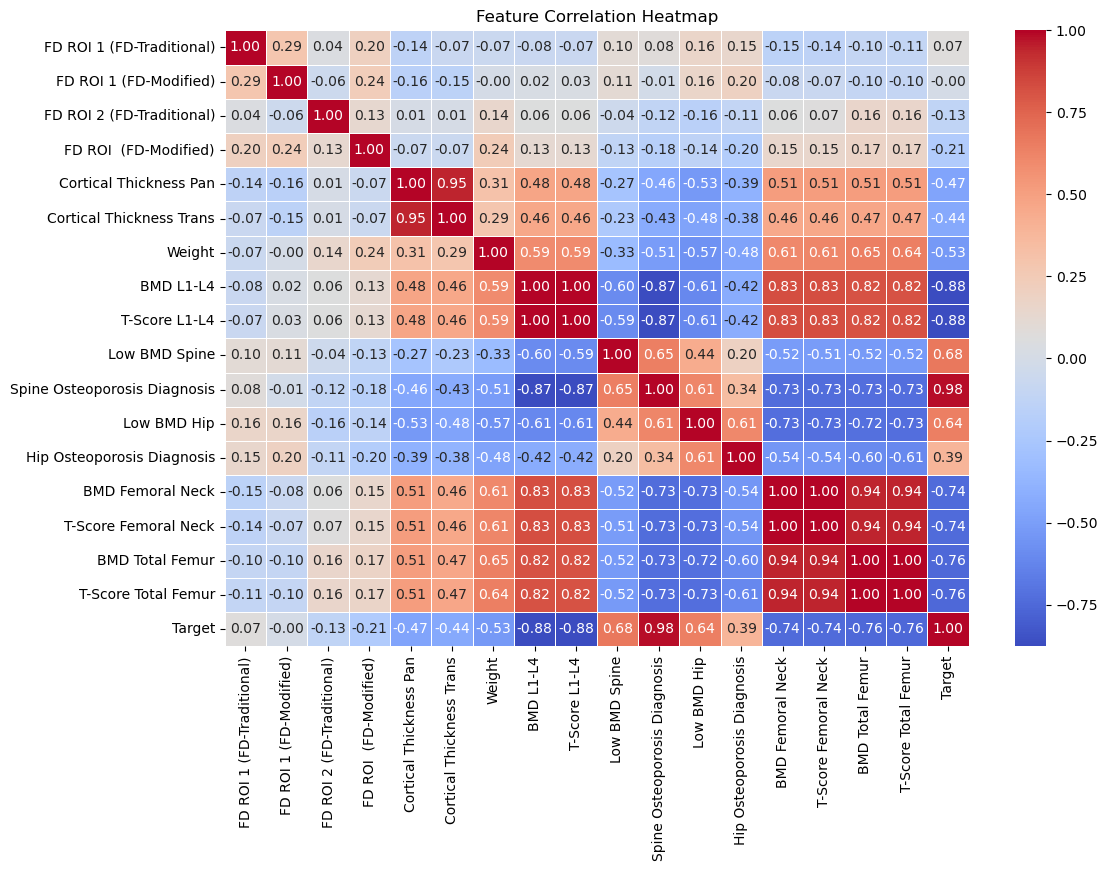

In [180]:

cor_m = df_combined.corr()
plt.figure(figsize=(12, 8))
sn.heatmap(cor_m, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Feature Correlation Heatmap')
plt.show()

**From the heatmap, we can see the results are pretty consistent as before, so we can conclude our model here.**